<a href="https://colab.research.google.com/github/axeaoey/227361-Quiz1/blob/main/test%E0%B8%95%E0%B9%89%E0%B8%99%E0%B9%84%E0%B8%A1%E0%B9%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving car_data.csv to car_data.csv


In [ ]:
data = pd.read_csv(next(iter(uploaded)))

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       100 non-null    int64  
 1   Gender        100 non-null    object 
 2   Age           95 non-null     float64
 3   AnnualSalary  95 non-null     float64
 4   Purchased     100 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB
None


In [ ]:
data.dropna(inplace=True)

In [ ]:
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])  # แปลง Male = 1, Female = 0

data['Purchased'] = data['Purchased'].map({'No': 0, 'Yes': 1})  # แปลง Yes = 1, No = 0

In [ ]:
X = data[['Gender', 'Age', 'AnnualSalary']]
y = data['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_acc:.2f}')
print(f'Testing Accuracy: {test_acc:.2f}')

Training Accuracy: 0.99
Testing Accuracy: 0.78


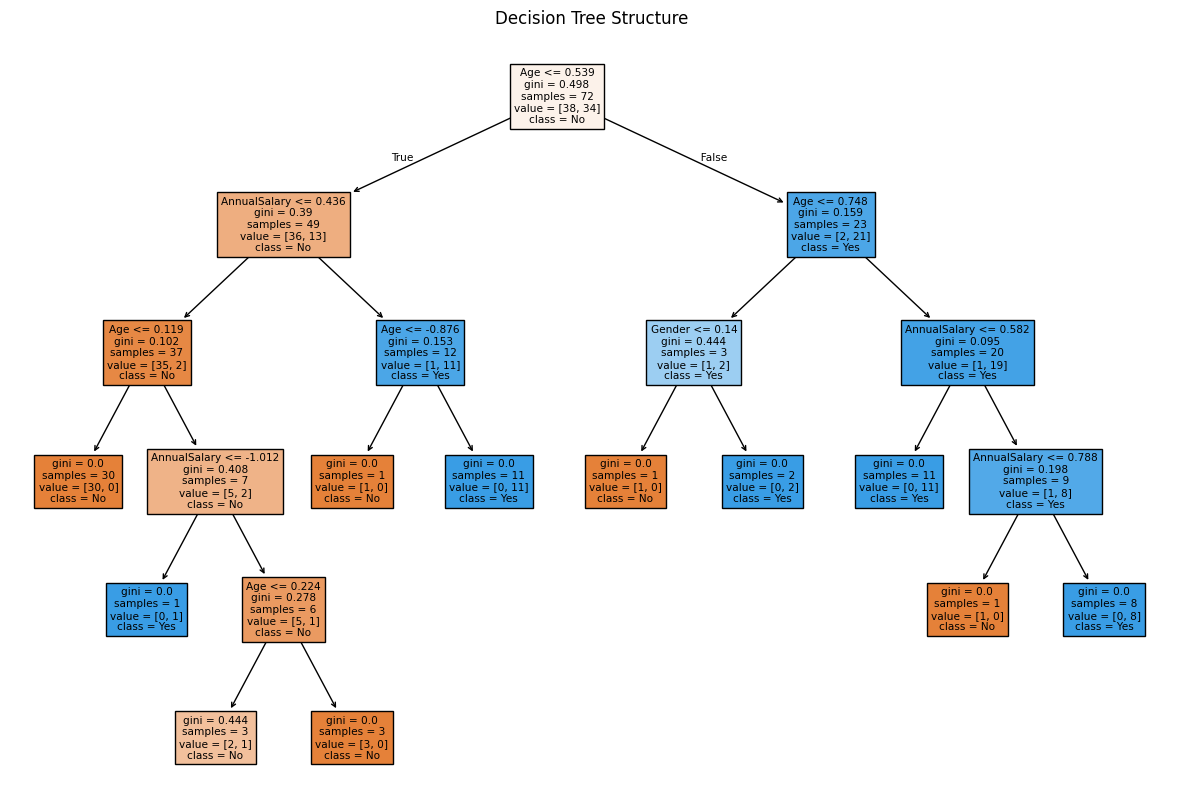

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=['Gender', 'Age', 'AnnualSalary'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Structure")
plt.show()

In [ ]:
feature_importance = model.feature_importances_
feature_names = ['Gender', 'Age', 'AnnualSalary']

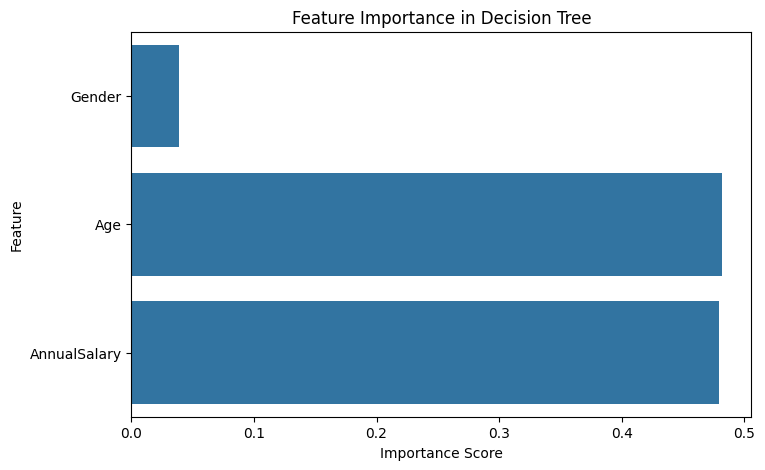

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.show()